In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Question 2

# What is the output of a smoothing, linear filter

# 1. Minimum of pixel values
# 2. Maximum of pixel values
# 3. Average of pixel values
# 4. Median of pixel values

# Answer: 3

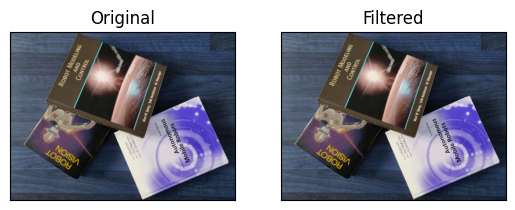

In [3]:
# Quesiton 3

import numpy as np
import cv2
import matplotlib.pyplot as plt

matrix3x3 = np.array([[0,0,0],[0,0,0],[0,1,0]])

# convolve matrix3x3 with the image Ex21_1.png
img = cv2.imread('Ex21_1.png')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.filter2D(img, -1, matrix3x3)

# display before and after images
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2, cmap = 'gray')
plt.title('Filtered'), plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
# Quesiton 4


# Linear filters are used for smoothing and sharpening images.
# Smoothing is done by averaging the pixel values in the neighborhood of the pixel to be smoothed.
# Sharpening is done by subtracting the average of the pixel values in the neighborhood of the pixel to be sharpened from the pixel value itself.

# Non-linear filters are used for noise removal.
# Median filter is a non-linear filter that replaces the pixel value with the median of the pixel values in the neighborhood of the pixel to be filtered.


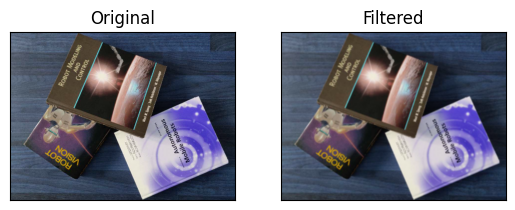

In [5]:
# Quesiton 5
matrix3x3 = np.array([[0.2,0,0.2],[0,0.2,0],[0.2,0,0.2]])

# convolve matrix3x3 with the image Ex21_1.png
img = cv2.imread('Ex21_1.png')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.filter2D(img, -1, matrix3x3)

# display before and after images
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2, cmap = 'gray')
plt.title('Filtered'), plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
# Question 10

import cv2

# import Ex21_1.png and convert to grayscale image
img = cv2.imread('Exam Files/Question_10/books.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply canny edge detection to the image with parameters 100, 200
edges = cv2.Canny(img,100,200)

# apply HoughLines to the image with parameters rho = 1, theta = 0.0017 and threshold = 200
lines = cv2.HoughLines(edges,1,0.0017,200)

# how many lines are detected
print("Number of lines detected: ", len(lines))

Number of lines detected:  32


In [5]:
# Question 11

#import Ex21_1.png and convert to grayscale image
img = cv2.imread('Exam Files/Question_11/books.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply harris corner detection to the image with parameters blockSize = 2, ksize = 3, k = 0.04
dst = cv2.cornerHarris(img,2,3,0.04)

# detecting how many values are greater than 0.01
count = 0
for i in range(len(dst)):
    for j in range(len(dst[i])):
        if dst[i][j] > 0.01:
            count += 1

# print the number of corners detected
print("Number of corners detected: ", count)

Number of corners detected:  188


In [8]:
# Question 12

#import things1 and things2 and convert to grayscale image
img = cv2.imread('Exam Files/Question_12/things1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread('Exam Files/Question_12/things2.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# using cv2.goodFeaturesToTrack() to detect corners with parameters maxCorners = 100, qualityLevel = 0.3, minDistance = 7
corners = cv2.goodFeaturesToTrack(img,100,0.3,7)

# using cv2.calcOpticalFlowPyrLK() to track the corners in things2
corners2, st, err = cv2.calcOpticalFlowPyrLK(img, img2, corners, None)

# what is the maximum amount of pixels moved for any object in the x direction
max_x = 0
for i in range(len(corners)):
    if abs(corners[i][0][0] - corners2[i][0][0]) > max_x:
        max_x = abs(corners[i][0][0] - corners2[i][0][0])

# what is the maximum amount of pixels moved for any object in the y direction
max_y = 0
for i in range(len(corners)):
    if abs(corners[i][0][1] - corners2[i][0][1]) > max_y:
        max_y = abs(corners[i][0][1] - corners2[i][0][1])

# print the maximum amount of pixels moved for any object in the x direction
print("Maximum amount of pixels moved in x direction: ", max_x)

Maximum amount of pixels moved in x direction:  15.636841


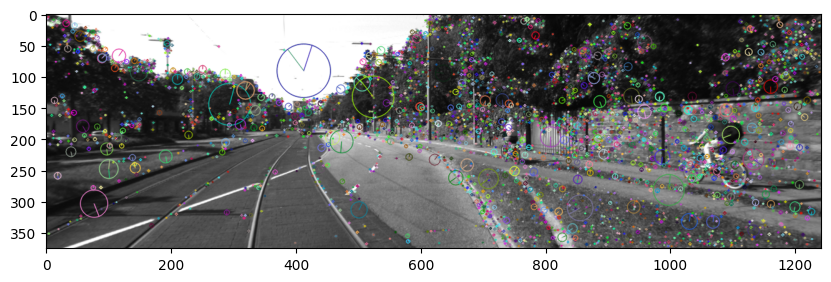

In [9]:
# Question 18

# importing left.png and right.png and converting to grayscale
img1 = cv2.imread('Exam Files/Question_18/left.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread('Exam Files/Question_18/right.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

kp_img = cv2.drawKeypoints(img2, kp2, img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (10,10))
plt.imshow(kp_img)

bf = cv2.BFMatcher()
matches = bf.match(des1,des2)

# Sort them in the order of their distance (i.e. best matches first).
matches = sorted(matches, key = lambda x:x.distance)


nb_matches = 2000

good = []
pts1 = []
pts2 = []

for m in matches[:nb_matches]:
    good.append(m)
    pts1.append(kp1[m.queryIdx].pt)
    pts2.append(kp2[m.trainIdx].pt)

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
    
"""
Implement findFundamentalMat here:
F, mask = ...
"""
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)

# We select only inlier points
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]

In [10]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

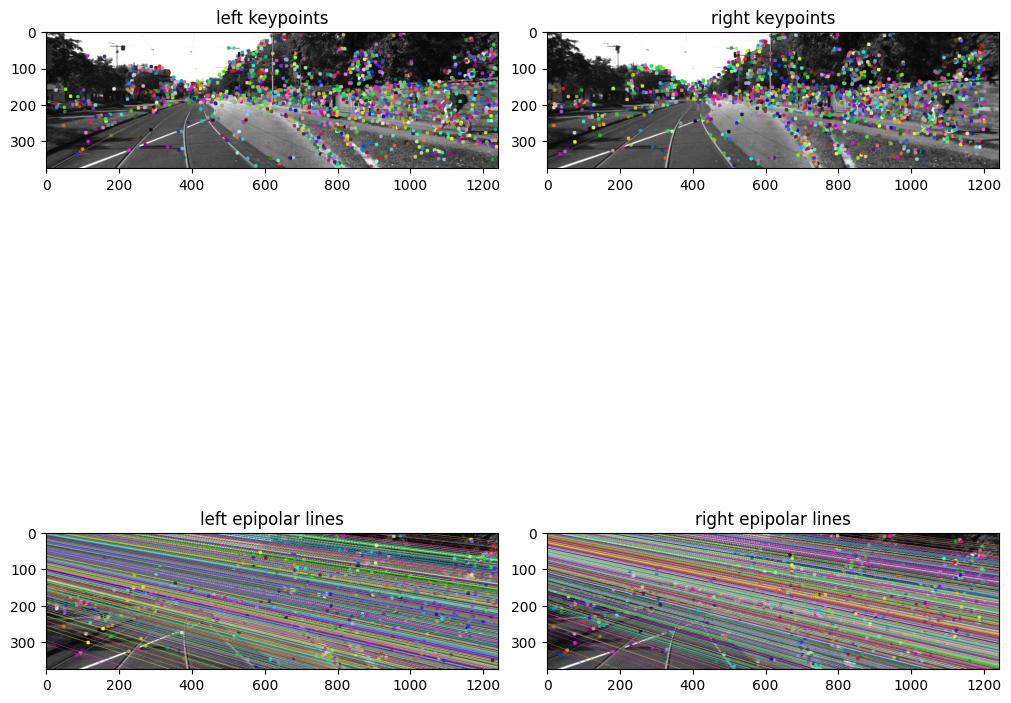

In [11]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2 ,F)
lines1 = lines1.reshape(-1, 3)
img5, img6 = drawlines(img1, img2, lines1, pts1, pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F)
lines2 = lines2.reshape(-1, 3)
img3, img4 = drawlines(img2, img1, lines2, pts2, pts1)

fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(10,10))
axs[0, 0].imshow(img4)
axs[0, 0].set_title('left keypoints')
axs[0, 1].imshow(img6)
axs[0, 1].set_title('right keypoints')
axs[1, 0].imshow(img5)
axs[1, 0].set_title('left epipolar lines')
axs[1, 1].imshow(img3)
axs[1, 1].set_title('right epipolar lines')
plt.show()

In [12]:
w, h = lines1.shape
######### THE AVERAGE OF ALL EPILINES #########
print(sum(lines1)/w)
avg1 = sum(lines1)/w
print(sum(lines2)/w)
avg2 = sum(lines2)/w

[ 0.18988384 -0.98116106 40.813713  ]
[ -0.20276901   0.97847235 -35.952347  ]
